In [1]:
import labellines
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Allelic imbalance as a function of allelic copynumber and purity

In [2]:
colors = mpl.cm.get_cmap("tab10").colors

### Plot of allelic imbalance curves for a range of ploidies

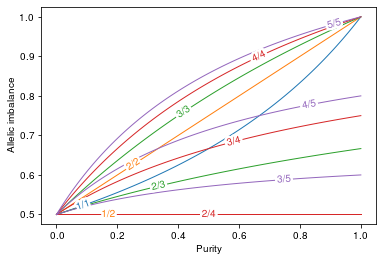

In [3]:
def imb(alpha, na, tau):
    return (1 + alpha*(na - 1))/(2*(1 - alpha) + tau*alpha)

alpha = np.linspace(0, 1, 100)
plt.figure(123); plt.clf()
for tau in range(1, 6):
    for na in range(1, tau + 1):
        if na < tau/2:
            continue
        plt.plot(alpha, imb(alpha, na, tau), color = colors[tau - 1], label = f"{na}/{tau}")

labellines.labelLines(plt.gca().get_lines(), zorder=2.5)

plt.xlabel("Purity")
plt.ylabel("Allelic imbalance");

Allelic imbalance curves do not uniquely define states of allelic copynumber, but it's close!

### A given set of allelic imbalances can correspond to a variety of allelic copynumbers

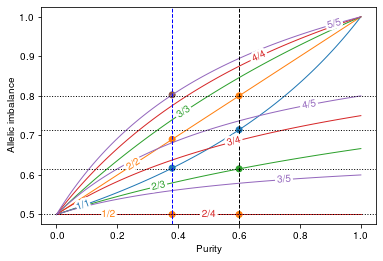

In [6]:
plt.figure(124); plt.clf()
for tau in range(1, 6):
    for na in range(1, tau + 1):
        if na < tau/2:
            continue
        plt.plot(alpha, imb(alpha, na, tau), color = colors[tau - 1], label = f"{na}/{tau}")

labellines.labelLines(plt.gca().get_lines(), zorder=2.5)

for x in imb(0.6, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]):
    plt.axhline(x, color = 'k', linestyle = ':')
    
plt.axvline(0.6, color = 'k', linestyle = '--')
plt.scatter(0.6*np.r_[1, 1, 1, 1], imb(0.6, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]), c = np.array(colors)[np.r_[2, 1, 1, 0]])

plt.axvline(0.38, color = 'b', linestyle = '--')
plt.scatter(0.38*np.r_[1, 1, 1, 1], imb(0.38, np.r_[5, 1, 2, 1], np.r_[5, 2, 2, 1]), c = np.array(colors)[np.r_[5, 1, 1, 0]])

plt.xlabel("Purity")
plt.ylabel("Allelic imbalance");

### Downsampling purities produces traces over allelic imbalance curves

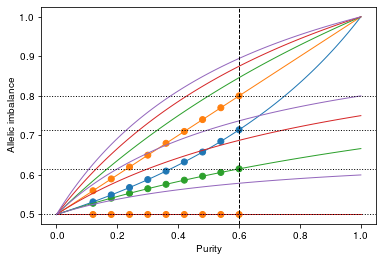

In [11]:
plt.figure(125); plt.clf()
for tau in range(1, 6):
    for na in range(1, tau + 1):
        if na < tau/2:
            continue
        plt.plot(alpha, imb(alpha, na, tau), color = colors[tau - 1], label = f"{na}/{tau}")

for x in imb(0.6, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]):
    plt.axhline(x, color = 'k', linestyle = ':')
    
for a in 0.6*np.r_[0.2:1.1:0.1]:
    plt.scatter(a*np.r_[1, 1, 1, 1], imb(a, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]), c = np.array(colors)[np.r_[2, 1, 1, 0]])

plt.axvline(0.6, color = 'k', linestyle = '--')

plt.xlabel("Purity")
plt.ylabel("Allelic imbalance");

### Allelic imbalance curves for a given allelic copynumber are not memoryless

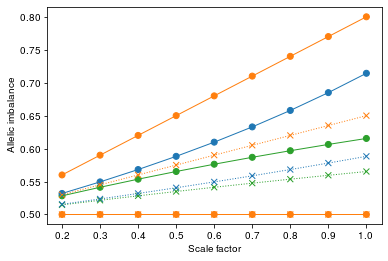

In [8]:
plt.figure(126); plt.clf()
#for tau in range(1, 6):
#    for na in range(1, tau + 1):
#        if na < tau/2:
#            continue
#        plt.plot(alpha, imb(alpha, na, tau), color = colors[tau - 1], label = f"{na}/{tau}")

#labellines.labelLines(plt.gca().get_lines(), zorder=2.5)

#for x in imb(0.6, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]):
#    plt.axhline(x, color = 'k', linestyle = ':')
    
for a in 0.6*np.r_[0.2:1.1:0.1]:
    plt.scatter(a*np.r_[1, 1, 1, 1], imb(a, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]), c = np.array(colors)[np.r_[2, 1, 1, 0]])

for na, tau in np.c_[np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]]:
    plt.plot(0.6*np.r_[0.2:1.1:0.1], imb(0.6*np.r_[0.2:1.1:0.1], na, tau), color = colors[tau - 1])    

for a in 0.3*np.r_[0.2:1.1:0.1]:
    plt.scatter(0.6/0.3*a*np.r_[1, 1, 1, 1], imb(a, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]), c = np.array(colors)[np.r_[2, 1, 1, 0]], marker = "x")

for na, tau in np.c_[np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]]:
    plt.plot(0.6*np.r_[0.2:1.1:0.1], imb(0.3*np.r_[0.2:1.1:0.1], na, tau), color = colors[tau - 1], linestyle = ":")  

#for a in 0.38*np.r_[0.2:1.1:0.1]:
#    plt.scatter(0.6/0.38*a*np.r_[1, 1, 1, 1], imb(a, np.r_[5, 1, 2, 1], np.r_[5, 2, 2, 1]), c = np.array(colors)[np.r_[5, 1, 1, 0]], marker = "x")    

#for na, tau in np.c_[np.r_[5, 1, 2, 1], np.r_[5, 2, 2, 1]]:
#    plt.plot(0.6*np.r_[0.2:1.1:0.1], imb(0.38*np.r_[0.2:1.1:0.1], na, tau), color = colors[tau - 1], linestyle = ":")
    
#plt.axvline(0.6, color = 'k', linestyle = '--')

plt.xticks(0.6*np.r_[0.2:1.1:0.1], [f"{x:0.2}" for x in np.r_[0.2:1.1:0.1]])

plt.xlabel("Scale factor")
plt.ylabel("Allelic imbalance");

### Curves for true ...

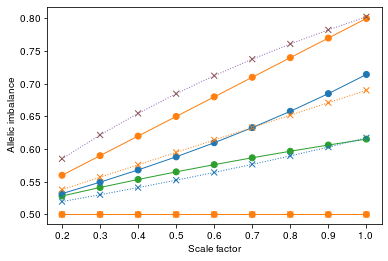

In [12]:
plt.figure(126); plt.clf()
#for tau in range(1, 6):
#    for na in range(1, tau + 1):
#        if na < tau/2:
#            continue
#        plt.plot(alpha, imb(alpha, na, tau), color = colors[tau - 1], label = f"{na}/{tau}")

#labellines.labelLines(plt.gca().get_lines(), zorder=2.5)

#for x in imb(0.6, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]):
#    plt.axhline(x, color = 'k', linestyle = ':')
    
for a in 0.6*np.r_[0.2:1.1:0.1]:
    plt.scatter(a*np.r_[1, 1, 1, 1], imb(a, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]), c = np.array(colors)[np.r_[2, 1, 1, 0]])

for na, tau in np.c_[np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]]:
    plt.plot(0.6*np.r_[0.2:1.1:0.1], imb(0.6*np.r_[0.2:1.1:0.1], na, tau), color = colors[tau - 1])    

#for a in 0.3*np.r_[0.2:1.1:0.1]:
#    plt.scatter(0.6/0.3*a*np.r_[1, 1, 1, 1], imb(a, np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]), c = np.array(colors)[np.r_[2, 1, 1, 0]], marker = "x")

#for na, tau in np.c_[np.r_[2, 1, 2, 1], np.r_[3, 2, 2, 1]]:
#    plt.plot(0.6*np.r_[0.2:1.1:0.1], imb(0.3*np.r_[0.2:1.1:0.1], na, tau), color = colors[tau - 1], linestyle = ":")  

for a in 0.38*np.r_[0.2:1.1:0.1]:
    plt.scatter(0.6/0.38*a*np.r_[1, 1, 1, 1], imb(a, np.r_[5, 1, 2, 1], np.r_[5, 2, 2, 1]), c = np.array(colors)[np.r_[5, 1, 1, 0]], marker = "x")    

for na, tau in np.c_[np.r_[5, 1, 2, 1], np.r_[5, 2, 2, 1]]:
    plt.plot(0.6*np.r_[0.2:1.1:0.1], imb(0.38*np.r_[0.2:1.1:0.1], na, tau), color = colors[tau - 1], linestyle = ":")
    
#plt.axvline(0.6, color = 'k', linestyle = '--')

plt.xticks(0.6*np.r_[0.2:1.1:0.1], [f"{x:0.2}" for x in np.r_[0.2:1.1:0.1]])

plt.xlabel("Scale factor")
plt.ylabel("Allelic imbalance");

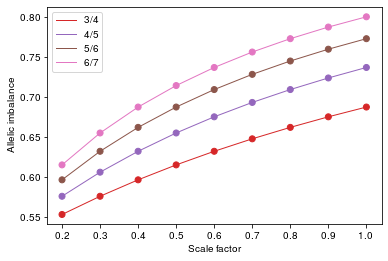

In [20]:
plt.figure(127); plt.clf()
for a in 0.6*np.r_[0.2:1.1:0.1]:
    plt.scatter(a*np.r_[1, 1, 1, 1], imb(a, np.r_[3, 4, 5, 6], np.r_[4, 5, 6, 7]), c = np.array(colors)[np.r_[4, 5, 6, 7] - 1])
    
for na, tau in np.c_[np.r_[3, 4, 5, 6], np.r_[4, 5, 6, 7]]:
    plt.plot(0.6*np.r_[0.2:1.1:0.1], imb(0.6*np.r_[0.2:1.1:0.1], na, tau), color = colors[tau - 1])
    
plt.xticks(0.6*np.r_[0.2:1.1:0.1], [f"{x:0.2}" for x in np.r_[0.2:1.1:0.1]])
    
plt.xlabel("Scale factor")
plt.ylabel("Allelic imbalance");

plt.legend(["3/4", "4/5", "5/6", "6/7"]);

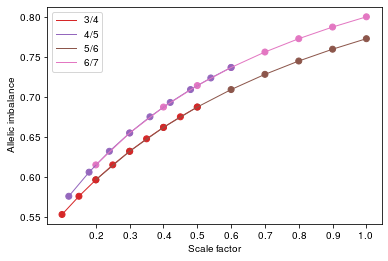

In [43]:
plt.figure(127); plt.clf()
for a in 0.6*np.r_[0.2:1.1:0.1]:
    plt.scatter(a*np.r_[0.5, 0.6, 1, 1], imb(a, np.r_[3, 4, 5, 6], np.r_[4, 5, 6, 7]), c = np.array(colors)[np.r_[4, 5, 6, 7] - 1])
    
for na, tau, c in np.c_[np.r_[3, 4, 5, 6], np.r_[4, 5, 6, 7], np.r_[0.5, 0.6, 1, 1]]:
    plt.plot(0.6*c*np.r_[0.2:1.1:0.1], imb(0.6*np.r_[0.2:1.1:0.1], na, tau), color = colors[int(tau) - 1])
    
plt.xticks(0.6*np.r_[0.2:1.1:0.1], [f"{x:0.2}" for x in np.r_[0.2:1.1:0.1]])
    
plt.xlabel("Scale factor")
plt.ylabel("Allelic imbalance");

plt.legend(["3/4", "4/5", "5/6", "6/7"]);

In [39]:
np.c_[np.r_[3, 4, 5, 6], np.r_[4, 5, 6, 7], np.r_[0.5, 0.6, 1, 1]]

array([[3. , 4. , 0.5],
       [4. , 5. , 0.6],
       [5. , 6. , 1. ],
       [6. , 7. , 1. ]])